In [97]:
from google.colab import files
adfile=files.upload()

Saving wine.csv to wine (1).csv
Saving car.csv to car (1).csv


In [98]:
#!pip install catboost

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,classification_report
from catboost import CatBoostClassifier,CatBoostRegressor
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

### ****Classifier****

In [100]:
df=pd.read_csv("wine.csv")

In [101]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,good
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,good
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [102]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [103]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [104]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [106]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [107]:
le=LabelEncoder()
df_cat['quality']=le.fit_transform(df_cat['quality'])

In [108]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [109]:
xl=df_new.drop('quality',axis=1)
yl=df_new['quality']

In [110]:
xtrain,xtest,ytrain,ytest=train_test_split(xl,yl,test_size=0.3,random_state=123)

Accuracy score= 0.7083333333333334
Precision score= 0.6985294117647058
Recall score= 0.7661290322580645
F1 score= 0.7307692307692308
              precision    recall  f1-score   support

           0       0.72      0.65      0.68       232
           1       0.70      0.77      0.73       248

    accuracy                           0.71       480
   macro avg       0.71      0.71      0.71       480
weighted avg       0.71      0.71      0.71       480

Confusion Matrix


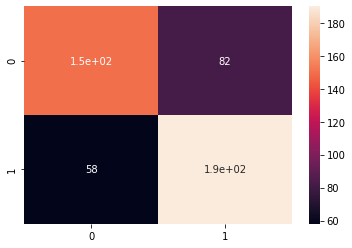

In [111]:
logr= LogisticRegression()
logr.fit(xtrain,ytrain)
yhat=logr.predict(xtest)
print("Accuracy score=",accuracy_score(ytest,yhat))
print("Precision score=",precision_score(ytest,yhat))
print("Recall score=",recall_score(ytest,yhat))
print("F1 score=",f1_score(ytest,yhat))
print(classification_report(ytest,yhat))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(ytest,yhat),annot=True)
plt.show()

In [112]:
x=df.drop('quality',axis=1)
y=df['quality']

In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=123)

Accuracy score= 0.7229166666666667
Classification Report
              precision    recall  f1-score   support

         bad       0.74      0.66      0.70       232
        good       0.71      0.78      0.74       248

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.72      0.72      0.72       480

Confusion Matrix


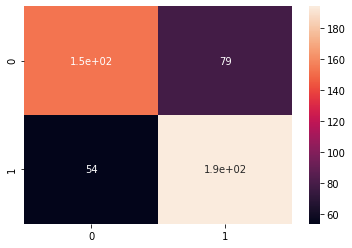

In [114]:
cb=CatBoostClassifier(learning_rate=0.03, loss_function="Logloss"	, n_estimators=100)
cb.fit(xtrain, ytrain, eval_set=(xtest, ytest), verbose=False)
yhat=cb.predict(xtest)
print("Accuracy score=",accuracy_score(ytest,yhat))
print("Classification Report")
print(classification_report(ytest,yhat))
print("Confusion Matrix")
sns.heatmap(confusion_matrix(ytest,yhat),annot=True)
plt.show()

### **Regressor**

In [115]:
df1=pd.read_csv("car.csv")

In [116]:
df1

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [117]:
df1.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [118]:
df1.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [120]:
df_num1=df1.select_dtypes(['int64','float64'])
df_cat1=df1.select_dtypes(object)

In [121]:
le=LabelEncoder()
for col in df_cat1:
  df_cat1[col]=le.fit_transform(df_cat1[col])

In [122]:
df_new1=pd.concat([df_num1,df_cat1],axis=1)

In [123]:
df_new1

,year,selling_price,km_driven,name,fuel,seller_type,transmission,owner
0,2007,60000,70000,775,4,1,1,0
1,2007,135000,50000,1041,4,1,1,0
2,2012,600000,100000,505,1,1,1,0
3,2017,250000,46000,118,4,1,1,0
4,2014,450000,141000,279,1,1,1,2
...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,602,1,1,1,2
4336,2014,409999,80000,601,1,1,1,2
4337,2009,110000,83000,777,4,1,1,2
4338,2016,865000,90000,381,1,1,1,0


In [124]:
xl1=df_new1.drop('selling_price',axis=1)
yl1=df_new1['selling_price']

In [125]:
xtrain,xtest,ytrain,ytest=train_test_split(xl1,yl1,test_size=0.3,random_state=123)

R2 score-  0.4402952133567888


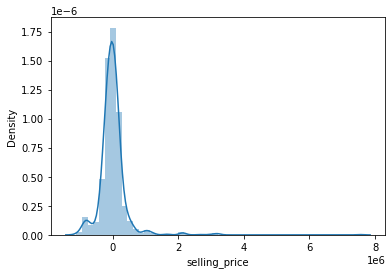

In [126]:
linr= LinearRegression()
linr.fit(xtrain,ytrain)
yhat=linr.predict(xtest)
residual=ytest-yhat
sns.distplot(residual)
print("R2 score- ",r2_score(ytest,yhat))

In [127]:
x1=df1.drop('selling_price',axis=1)
y1=df1['selling_price']

In [128]:
xtrain,xtest,ytrain,ytest=train_test_split(xl1,yl1,test_size=0.3,random_state=123)

R2 score-  0.6712619811677952


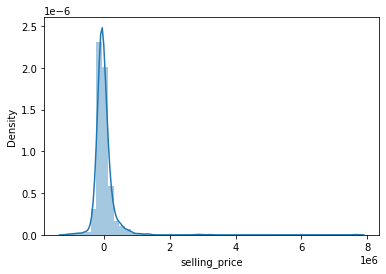

In [129]:
cb=CatBoostRegressor(learning_rate=0.03, loss_function="RMSE"	, n_estimators=100)
cb.fit(xtrain, ytrain, verbose=False)
yhat=cb.predict(xtest)
residual=ytest-yhat
sns.distplot(residual)
print("R2 score- ",r2_score(ytest,yhat))